<a href="https://colab.research.google.com/github/jaeohshin/keras/blob/main/tutorial2_classifying_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here ML for the classifying news articles based on the words.

One news article can be one of 46 possible categories.

In [1]:
# download data

from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 1us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [6]:
#train_data[0]

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])



550378/550378 [==============================] - 1s 1us/step


In [11]:
train_labels[3]

4

In [12]:
#Vectorize the data 
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24])

In [21]:
len(train_labels)

8982

In [22]:
len(x_train)

8982

In [23]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [54]:
#def to_one_hot(labels, dimension=46):
#    results = np.zeros(len(labels), dimension)
#  for i, label in enumerate(labels):
#      results[i, label] = 1.
#  return results

#y_train = to_one_hot(train_labels)
#y_test = to_one_hot(test_labels)

In [55]:
# Vectorize the labels.

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [64]:
# Define the DL model
from tensorflow import keras
from tensorflow.keras import layers

model2 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [65]:
# model compile

model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [66]:
# Separate the train data into "real train" data and validation data
x_val = x_train[:1000]
y_val = y_train[:1000]

partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

In [67]:
history = model2.fit(partial_x_train, partial_y_train,
                     epochs=20,
                     batch_size=512,
                     validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 6s 47ms/step - loss: 2.6937 - accuracy: 0.4985 - val_loss: 1.8185 - val_accuracy: 0.6090
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.5323 - accuracy: 0.6620 - val_loss: 1.3928 - val_accuracy: 0.6800
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.1947 - accuracy: 0.7291 - val_loss: 1.2140 - val_accuracy: 0.7320
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.9901 - accuracy: 0.7841 - val_loss: 1.1015 - val_accuracy: 0.7500
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8236 - accuracy: 0.8257 - val_loss: 1.0118 - val_accuracy: 0.7840
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6802 - accuracy: 0.8574 - val_loss: 0.9526 - val_accuracy: 0.7900
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5681 - accuracy: 0.8811 - val_loss: 0.9298 - val_accuracy: 0.8000
Epoch 8/20
16

In [68]:
import matplotlib.pyplot as plt

history_dict = history.history

In [70]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

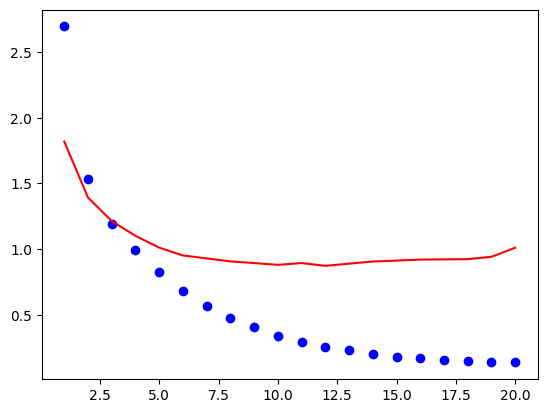

In [73]:
tr_loss = history_dict["loss"]
val_loss = history_dict["val_loss"]


n = range(1, len(tr_loss)+1)

plt.plot(n, tr_loss, 'bo', label="training_data_loss")
plt.plot(n, val_loss, 'r')

Text(0, 0.5, 'Accuracy')

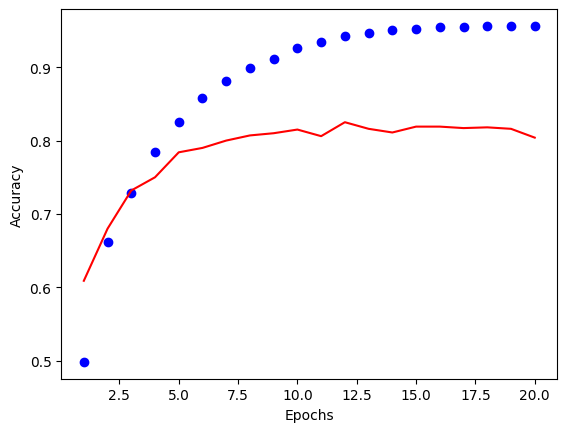

In [75]:
tr_acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.clf()

n = range(1, len(tr_loss)+1)

plt.plot(n, tr_acc, 'bo', label="training_data_accuracy")
plt.plot(n, val_acc, 'r')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

After ~9 epochs the validation data does not improve further. So it would be good idea to use only 5 epochs for the prediction. 